# 📊 Resumen de Resultados - Análisis Cinemático

## 🎯 Problema Resuelto
**Ecuación diferencial ordinaria:**  
\[
\frac{dv}{dt} = 0.12\,t^2 + 0.6\,t
\]

**Condiciones iniciales:**  
\[
v(0) = 0\ \text{m/s}, \quad x(0) = 0\ \text{m}
\]

## 📈 Soluciones Analíticas Obtenidas
\[
\begin{aligned}
\text{Velocidad:}\quad & v(t) = 0.04\,t^3 + 0.3\,t^2 \ \text{(m/s)} \\
\text{Posición:}\quad & x(t) = 0.01\,t^4 + 0.1\,t^3 \ \text{(m)}
\end{aligned}
\]

## 🔢 Valores Numéricos Clave

| Tiempo (s) | Aceleración (m/s²) | Velocidad (m/s) | Posición (m) |
|------------|--------------------|-----------------|--------------|
| 0          | 0.00               | 0.00            | 0.00         |
| 5          | 6.00               | 12.50           | 18.75        |
| 10         | 18.00              | 70.00           | 200.00       |

## 📊 Análisis de Comportamiento
### Características del Movimiento
**🚀 Aceleración variable**
- Crece cuadráticamente con el tiempo.
- En \( t = 10 \) s: \( a = 18.0 \) m/s².

**⚡ Velocidad creciente**
- Combinación cúbica-cuadrática.
- Velocidad final: \( v = 70.0 \) m/s.
- Velocidad promedio en 10 s: \( \bar{v} = 20.0 \) m/s.

**📍 Desplazamiento**
- Posición final: \( x = 200 \) m.
- Trayectoria polinómica de grado 4.


## Campo de isoclinas

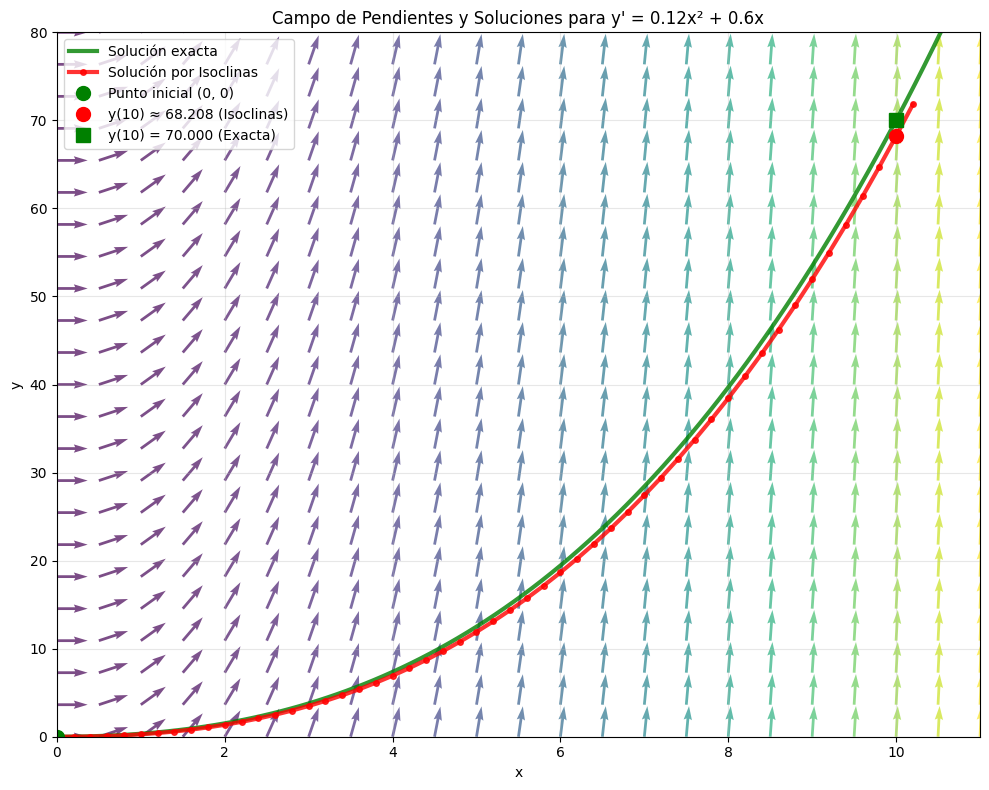

Solución exacta en x = 10: y = 70.000000
Solución por isoclinas en x = 10: y ≈ 68.208000
Error absoluto: 1.792000


In [4]:
from sqlalchemy import Null
import utils

def dy_dx(x, y = Null):
    """Función que define la ecuación diferencial y' = 0.12x² + 0.6x"""
    return 0.12*(x**2) + (0.6)*x

def exact_solution(x):
    """Solución exacta: y = 0.04x³ + 0.3x² + C
    Para la condición inicial y(0) = 0, entonces C = 0"""
    return 0.04*(x**3) + 0.3*(x**2)

utils.isocline(dy_dx, exact_solution , (0,11), (0,80) , 0.2, 23)

## Metodos Numéricos


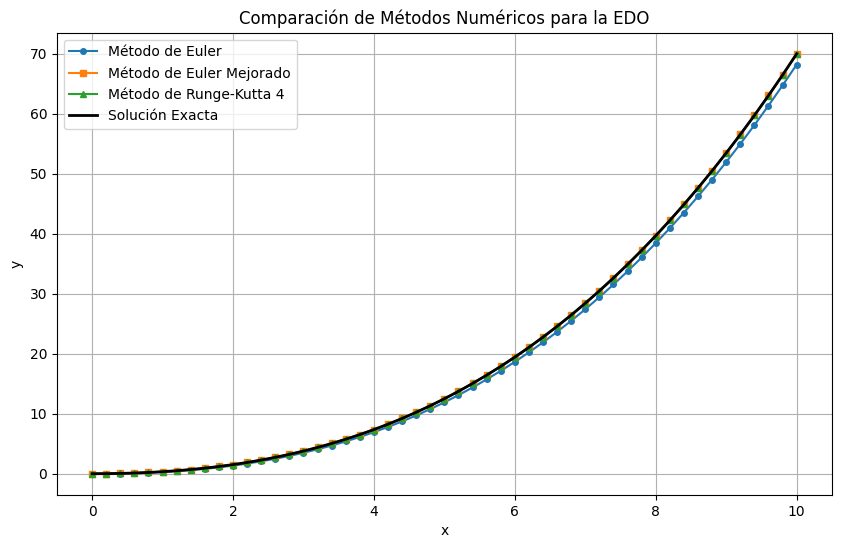

In [2]:
from matplotlib import pyplot as plt
import utils

x_euler , y_euler = utils.Euler_Method(dy_dx, 0, 0, 0.2, 10)
x_improved_euler , y_improved_euler = utils.Improved_Euler_Method(dy_dx, 0, 0, 0.2, 10)
x_rk4 , y_rk4 = utils.RK4_Method(dy_dx, 0, 0, 0.2, 10)
x_exact = [i*0.2 for i in range(51)]
y_exact = [exact_solution(x) for x in x_exact]

plt.figure(figsize=(10, 6))
plt.plot(x_euler, y_euler, label="Método de Euler", marker='o', markersize=4)
plt.plot(x_improved_euler, y_improved_euler, label="Método de Euler Mejorado", marker='s', markersize=4)
plt.plot(x_rk4, y_rk4, label="Método de Runge-Kutta 4", marker='^', markersize=4)
plt.plot(x_exact, y_exact, label="Solución Exacta", color='black', linewidth=2)
plt.title("Comparación de Métodos Numéricos para la EDO")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()





### Analisis de errores

### Error relativo

In [3]:
import numpy as np

y_exact_arr = np.array(y_exact, dtype=float)

mask = y_exact_arr != 0

euler_errors = np.zeros_like(y_exact_arr)
euler_errors[mask] = np.abs(y_exact_arr[mask] - np.array(y_euler, dtype=float)[mask]) / np.abs(y_exact_arr[mask])

improved_euler_errors = np.zeros_like(y_exact_arr)
improved_euler_errors[mask] = np.abs(y_exact_arr[mask] - np.array(y_improved_euler, dtype=float)[mask]) / np.abs(y_exact_arr[mask])

rk4_errors = np.zeros_like(y_exact_arr)
rk4_errors[mask] = np.abs(y_exact_arr[mask] - np.array(y_rk4, dtype=float)[mask]) / np.abs(y_exact_arr[mask])


print(f"Método de Euler: {round(euler_errors[-1], 6)}")
print(f"Método de Euler Mejorado: {round(improved_euler_errors[-1] , 6)}")
print(f"Método de Runge-Kutta 4: {round(rk4_errors[-1], 6)}")



Método de Euler: 0.0256
Método de Euler Mejorado: 0.000114
Método de Runge-Kutta 4: 0.0


### Error hacia adelante

In [4]:
euler_forward_error = np.abs(y_exact_arr - y_euler)
improved_euler_forward_error = np.abs(y_exact_arr - y_improved_euler)
rk4_forward_error = np.abs(y_exact_arr - y_rk4)

print(f"Euler (último paso): {euler_forward_error[-1]:.15f}")
print(f"Euler Mejorado (último paso): {improved_euler_forward_error[-1]:.15f}")
print(f"Runge-Kutta 4 (último paso): {rk4_forward_error[-1]:.15f}")

Euler (último paso): 1.791999999999987
Euler Mejorado (último paso): 0.008000000000024
Runge-Kutta 4 (último paso): 0.000000000000014


### Error hacia atrás

f(x) = y_exact
f^(x) = y_euler

Necesitamos:

x^ tq f^(x) = f(x^)

para cada y_euler encontrar x^ tq  f(x^) = y_euler
